# Auto encoder
An autoencoder is a type of neural network that can automatically encode information. It consists of two main components: an encoder and a decoder. The encoder learns to break down information into a compact encoding, while the decoder attempts to reconstruct the original information from the encoding generated by the encoder.

One important application of autoencoders is to reduce noise in data. By using an autoencoder, we can prevent our learning model from being trained on noisy data, which can lead to inaccurate predictions. Overall, autoencoders are a powerful tool for encoding and decoding information in a way that can improve the accuracy and robustness of machine learning models.

In [1]:
import numpy as np
import cv2 
from numpy import concatenate
import tensorflow as tf
import joblib
import pickle
import keras
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, Reshape, Input, InputLayer
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Conv2DTranspose, Dropout, SeparableConv2D, Concatenate
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from PIL import Image
import matplotlib.pyplot as plt 

2023-05-02 17:13:49.458463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
x_train = np.load('../Data/x_train_sample.npy')/255
y_train = np.load('../Data/y_train_sample.npy')
x_test = np.load('../Data/x_test_sample.npy')/255
y_test = np.load('../Data/y_test_sample.npy')

In [75]:
print(x_train.shape)
print(y_train.shape)

(1800, 256, 256, 3)
(1800, 15)


In [9]:
import matplotlib.pyplot as plt
def show_image(x):
    plt.imshow(np.clip(x, 0, 1))
# define a function to plot image from the ndarray.

In [89]:
x_train[0]
# print the ndarray of the first image from the train set.

array([[[0.5372549 , 0.5176471 , 0.5254902 ],
        [0.5647059 , 0.54509807, 0.5529412 ],
        [0.58431375, 0.5647059 , 0.57254905],
        ...,
        [0.50980395, 0.49019608, 0.49803922],
        [0.49803922, 0.47843137, 0.4862745 ],
        [0.53333336, 0.5137255 , 0.52156866]],

       [[0.5176471 , 0.49803922, 0.5058824 ],
        [0.52156866, 0.5019608 , 0.50980395],
        [0.52156866, 0.5019608 , 0.50980395],
        ...,
        [0.5019608 , 0.48235294, 0.49019608],
        [0.5294118 , 0.50980395, 0.5176471 ],
        [0.5764706 , 0.5568628 , 0.5647059 ]],

       [[0.5529412 , 0.53333336, 0.5411765 ],
        [0.5411765 , 0.52156866, 0.5294118 ],
        [0.5254902 , 0.5058824 , 0.5137255 ],
        ...,
        [0.5372549 , 0.5176471 , 0.5254902 ],
        [0.5294118 , 0.50980395, 0.5176471 ],
        [0.5294118 , 0.50980395, 0.5176471 ]],

       ...,

       [[0.4862745 , 0.4627451 , 0.48235294],
        [0.4862745 , 0.4627451 , 0.48235294],
        [0.4862745 , 0

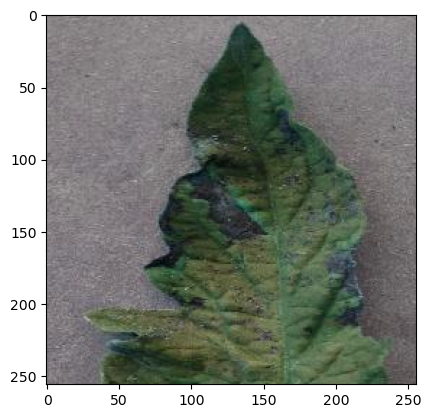

In [77]:
show_image(x_train[0])
#ploting the first image in our train set from ndarrray.

## First auto-encoder

https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/

Define a function which returns the encoder and decoder, and then the auto encoder is build by compiling the encoder and decoder. According to the reference, we can make the code_size bigger to make the image lose less information.

In [79]:
def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 256*256*3
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [80]:
IMG_SHAPE = x_train.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 64)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 64)                12582976  
                                                                 
 sequential_8 (Sequential)   (None, 256, 256, 3)       12779520  
                                                                 
Total params: 25,362,496
Trainable params: 25,362,496
Non-trainable params: 0
_________________________________________________________________
None


Train the auto encoder with our train set.

In [81]:
history = autoencoder.fit(x=x_train, y=x_train, epochs=100,
                validation_data=[x_test, x_test])

Epoch 1/100
57/57 [==============================] - 10s 170ms/step - loss: 0.8676 - val_loss: 0.0302
Epoch 2/100
57/57 [==============================] - 10s 179ms/step - loss: 0.0275 - val_loss: 0.0272
Epoch 3/100
57/57 [==============================] - 10s 178ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 4/100
57/57 [==============================] - 9s 164ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 5/100
57/57 [==============================] - 9s 153ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 6/100
57/57 [==============================] - 9s 150ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 7/100
57/57 [==============================] - 9s 157ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 8/100
57/57 [==============================] - 9s 160ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 9/100
57/57 [==============================] - 10s 168ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 10/100
57/57 [==============================] - 10s 174ms/step - loss: 0.0266 - v

Plot of the loss for the train and validation set for each epoch.

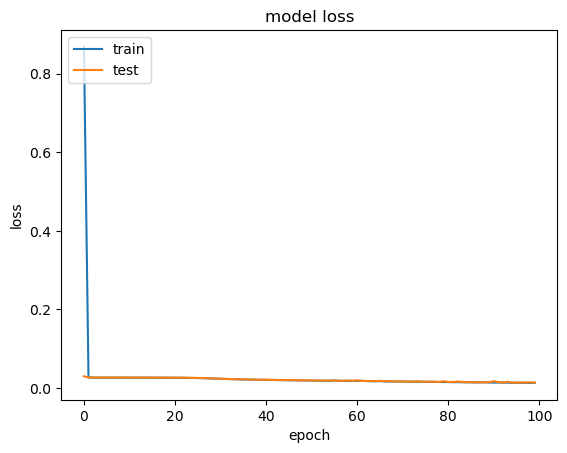

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Zoom in to see the loss after first few epoches.

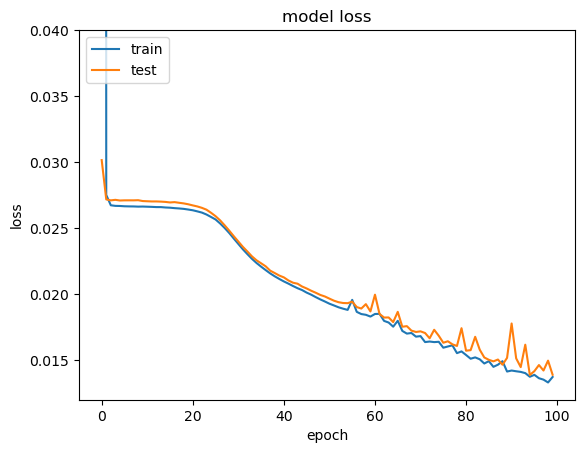

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.012, 0.04)
plt.show()

Defined a function to see the original image and the image processed by the auto encoder. We have plotted for the first five images in our test set, we see that the image has lost a lot information after passing through this auto encoder. Which seems useless, but we will still check its performance for denoising later.

1/1 [==============================] - 0s 53ms/step


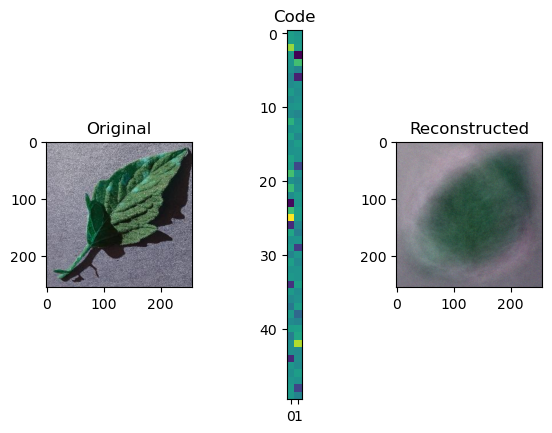

1/1 [==============================] - 0s 30ms/step


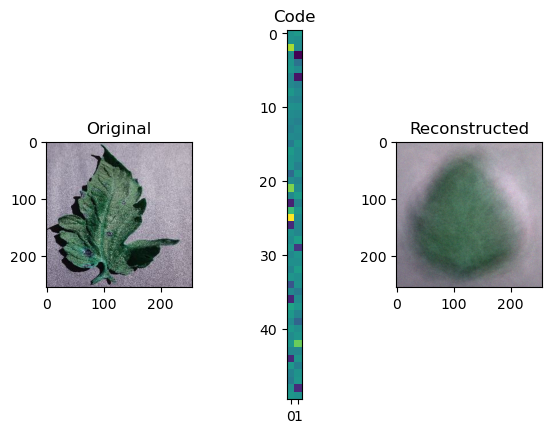

1/1 [==============================] - 0s 25ms/step


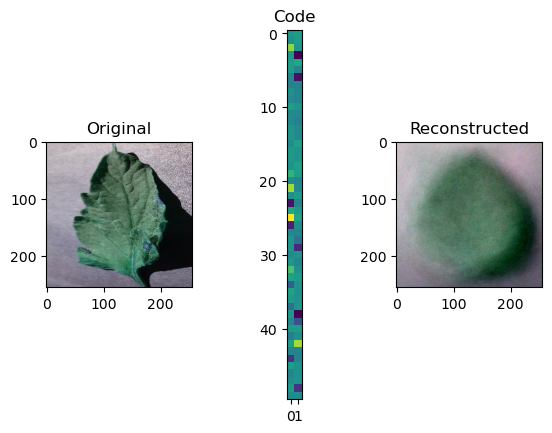

1/1 [==============================] - 0s 26ms/step


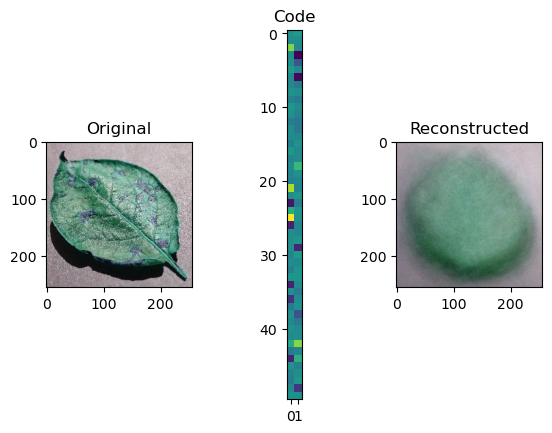

1/1 [==============================] - 0s 25ms/step


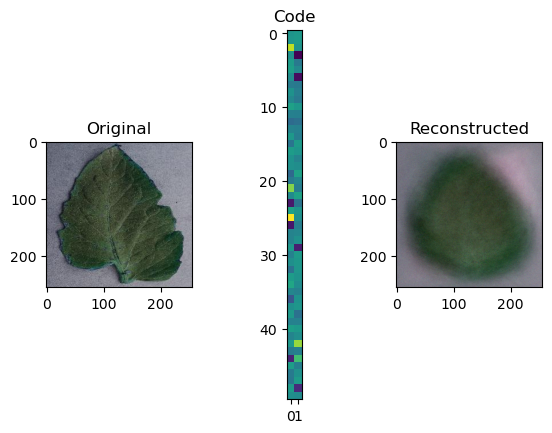

In [103]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = x_test[i]
    visualize(img,encoder,decoder)

In [112]:
autoencoder.save('Model/autoencoder')
#save our first auto encoder

INFO:tensorflow:Assets written to: Model/autoencoder/assets


INFO:tensorflow:Assets written to: Model/autoencoder/assets


In [114]:
autoencoder = keras.models.load_model('Model/autoencoder')
#load the encoder

Try bigger code_size to see if the quality of image improves

In [117]:
def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 256*256*3
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [118]:
encoder1, decoder1 = build_autoencoder(IMG_SHAPE, 128)

inp1 = Input(IMG_SHAPE)
code1 = encoder1(inp1)
reconstruction1 = decoder1(code1)

autoencoder1 = Model(inp1,reconstruction1)
autoencoder1.compile(optimizer='adamax', loss='mse')

print(autoencoder1.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 128)               25165952  
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       25362432  
                                                                 
Total params: 50,528,384
Trainable params: 50,528,384
Non-trainable params: 0
_________________________________________________________________
None


In [119]:
history = autoencoder1.fit(x=x_train, y=x_train, epochs=50,
                validation_data=[x_test, x_test])

Epoch 1/50
57/57 [==============================] - 16s 266ms/step - loss: 2.7392 - val_loss: 0.0590
Epoch 2/50
57/57 [==============================] - 16s 280ms/step - loss: 0.0340 - val_loss: 0.0277
Epoch 3/50
57/57 [==============================] - 15s 256ms/step - loss: 0.0271 - val_loss: 0.0274
Epoch 4/50
57/57 [==============================] - 14s 243ms/step - loss: 0.0270 - val_loss: 0.0273
Epoch 5/50
57/57 [==============================] - 13s 230ms/step - loss: 0.0269 - val_loss: 0.0272
Epoch 6/50
57/57 [==============================] - 13s 234ms/step - loss: 0.0268 - val_loss: 0.0272
Epoch 7/50
57/57 [==============================] - 13s 233ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 8/50
57/57 [==============================] - 14s 238ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 9/50
57/57 [==============================] - 14s 245ms/step - loss: 0.0266 - val_loss: 0.0270
Epoch 10/50
57/57 [==============================] - 15s 268ms/step - loss: 0.0266 - val_lo

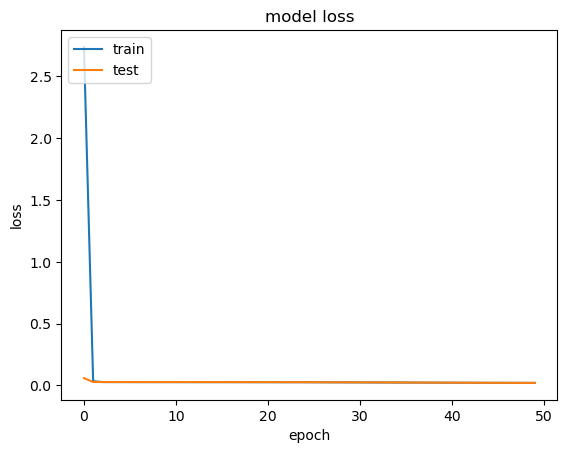

In [120]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

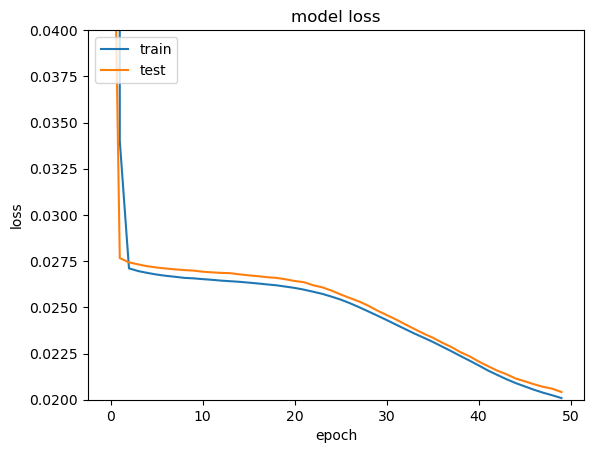

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.02, 0.04)
plt.show()

1/1 [==============================] - 0s 111ms/step


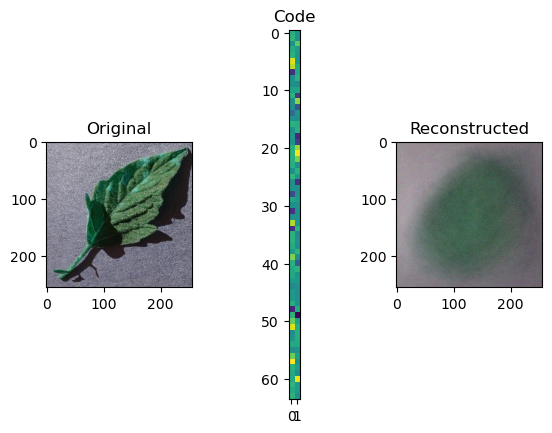

1/1 [==============================] - 0s 28ms/step


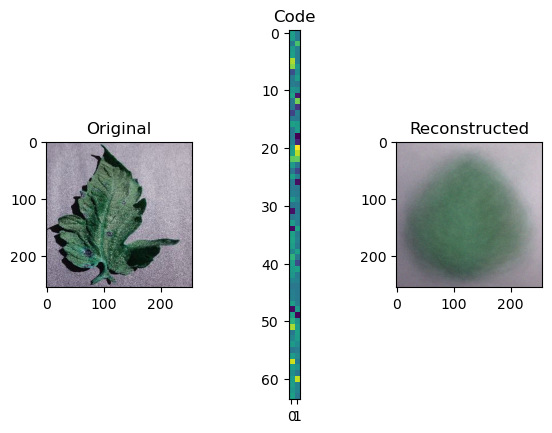

1/1 [==============================] - 0s 32ms/step


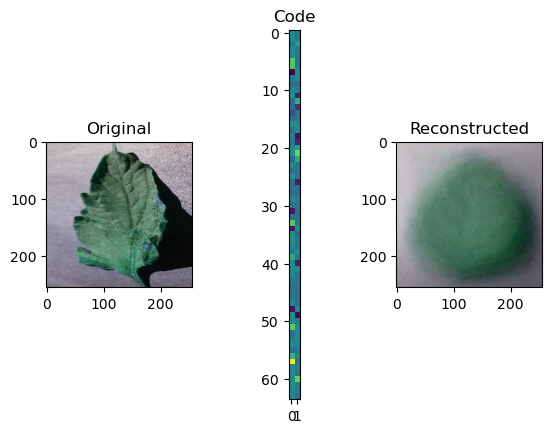

1/1 [==============================] - 0s 23ms/step


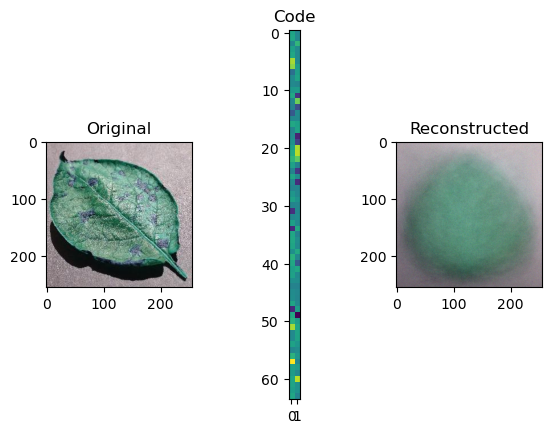

1/1 [==============================] - 0s 22ms/step


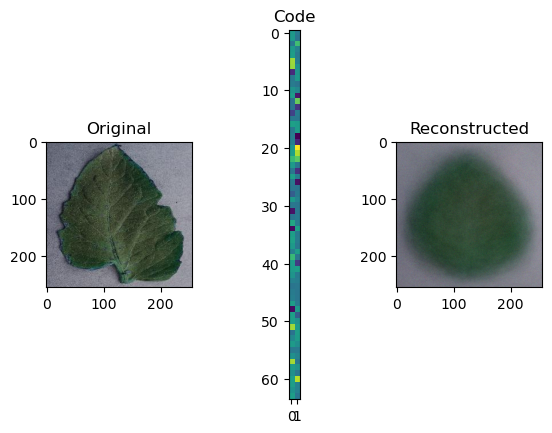

In [122]:
for i in range(5):
    img = x_test[i]
    visualize(img,encoder1,decoder1)

The images seems become worse, so I plan to try some more complex models.

In [123]:
autoencoder1.save('Model/autoencoder1')

INFO:tensorflow:Assets written to: Model/autoencoder1/assets


INFO:tensorflow:Assets written to: Model/autoencoder1/assets


In [ ]:
autoencoder1 = keras.models.load_model('Model/autoencoder1')

### More complex model
Since increasing the size_code in our first model didn't improve the quality of processed image, we are going to try two of the more complex model here, which is the models have mode layers for encoding and decoding.

https://medium.com/analytics-vidhya/denoising-autoencoder-on-colored-images-using-tensorflow-17bf63e19dad

https://github.com/therealcyberlord/tensorflow_keras_color_images_denoiser/blob/master/better_denoiser.ipynb

In [3]:
#tf.keras.backend.clear_session()

#### The first more complex model

In [21]:
def create_model():
  x = Input(shape=(256, 256, 3)) 

  # Encoder
  e_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  pool1 = MaxPooling2D((2, 2), padding='same')(e_conv1)
  batchnorm_1 = BatchNormalization()(pool1)
  e_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(batchnorm_1)
  pool2 = MaxPooling2D((2, 2), padding='same')(e_conv2)
  batchnorm_2 = BatchNormalization()(pool2)
  e_conv3 = Conv2D(16, (3, 3), activation='relu', padding='same')(batchnorm_2)
  h = MaxPooling2D((2, 2), padding='same')(e_conv3)


  # Decoder
  d_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(h)
  up1 = UpSampling2D((2, 2))(d_conv1)
  d_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
  up2 = UpSampling2D((2, 2))(d_conv2)
  d_conv3 = Conv2D(16, (1, 1), activation='relu')(up2)
  up3 = UpSampling2D((2, 2))(d_conv3)
  r = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3)

  model = Model(x, r)
  model.compile(optimizer='adam', loss='mse')
  return model

In [22]:
auto_encoder2 = create_model()

In [23]:
print(auto_encoder2.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0   

In [24]:
early_stop = EarlyStopping(monitor='loss', patience=3)
history = auto_encoder2.fit(x_train, x_train, epochs=5, batch_size=32, callbacks=[early_stop])

Epoch 1/5
57/57 [==============================] - 161s 3s/step - loss: 0.0110
Epoch 2/5
57/57 [==============================] - 168s 3s/step - loss: 0.0075
Epoch 3/5
57/57 [==============================] - 156s 3s/step - loss: 0.0071
Epoch 4/5
57/57 [==============================] - 151s 3s/step - loss: 0.0068
Epoch 5/5
57/57 [==============================] - 149s 3s/step - loss: 0.0067


In [27]:
#auto_encoder2.save('Model/autoencoder2')

INFO:tensorflow:Assets written to: Model/autoencoder2/assets


INFO:tensorflow:Assets written to: Model/autoencoder2/assets


In [ ]:
#auto_encoder2 = keras.models.load_model('Model/autoencoder2')

In [63]:
result = auto_encoder2.predict(x_test)

15/15 [==============================] - 9s 548ms/step


In [ ]:
np.save('Encodered_images',result)

In [4]:
def visualize2(img,result):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input


    plt.subplot(1,2,1)
    plt.title("Original")
    show_image(img)


    plt.subplot(1,2,2)
    plt.title("Reconstructed")
    show_image(result)
    plt.show()

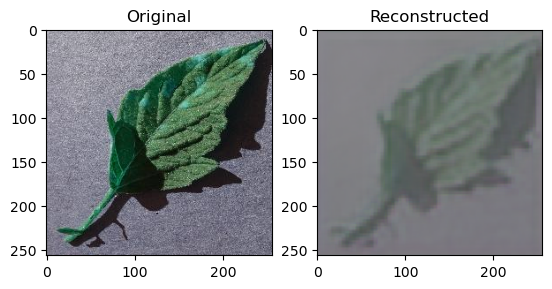

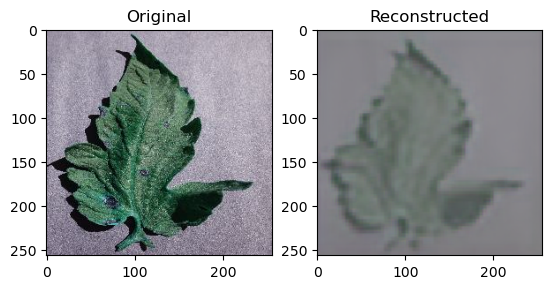

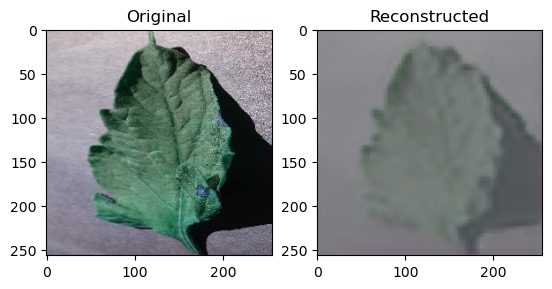

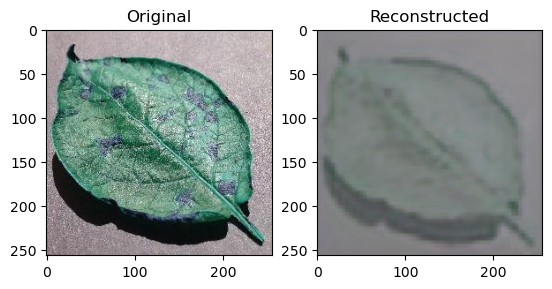

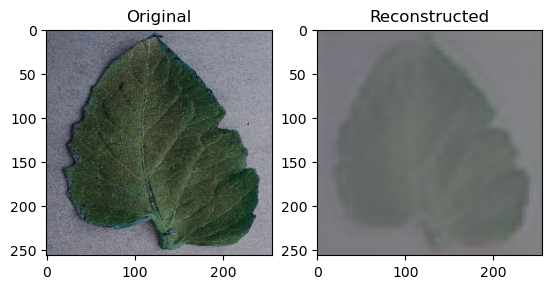

In [64]:
for i in range(5):
    img = x_test[i]
    rec = result[i]
    visualize2(img,rec)

Compared to our first simple autoencoder, this model produces images of much higher quality. However, we have observed that the colors in the processed images are significantly less vivid.

#### The second more complex model

In [4]:
input_img = tf.keras.layers.Input(shape=(256, 256, 3))

l1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(input_img)
l2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l1)
l3 = tf.keras.layers.MaxPool2D(padding='same')(l2)

l4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l3)
l5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l4)
l6 = tf.keras.layers.MaxPool2D(padding='same')(l5)

l7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l6)

l8 = tf.keras.layers.UpSampling2D()(l7)
l9 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l8)
l10 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l9)

l11 = tf.keras.layers.add([l10, l5])

l12 = tf.keras.layers.UpSampling2D()(l11)
l13 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l12)
l14 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l13)

l15 = tf.keras.layers.add([l14, l2])

decoded_image = tf.keras.layers.Conv2D(3, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l15)

auto_encoder = tf.keras.models.Model(inputs=(input_img), outputs=decoded_image)

auto_encoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [5]:
print(auto_encoder.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 256, 256, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_6 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d_5[0][0]']               
                                )                                                           

In [10]:
early_stop = EarlyStopping(monitor='loss', patience=3)
history = auto_encoder.fit(x_train, x_train, epochs=2, batch_size=32, callbacks=[early_stop])

Epoch 1/2
57/57 [==============================] - 2958s 52s/step - loss: 3.0178
Epoch 2/2
57/57 [==============================] - 3161s 55s/step - loss: 0.7846


In [11]:
auto_encoder.save('Model/autoencoder3')

INFO:tensorflow:Assets written to: Model/autoencoder3/assets


INFO:tensorflow:Assets written to: Model/autoencoder3/assets


In [6]:
auto_encoder = keras.models.load_model('Model/autoencoder3')

2023-04-03 13:26:23.785681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
result = auto_encoder.predict(x_test)

15/15 [==============================] - 167s 11s/step


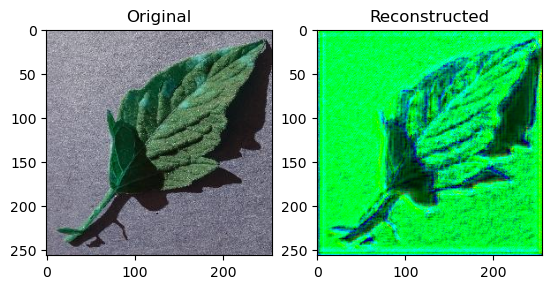

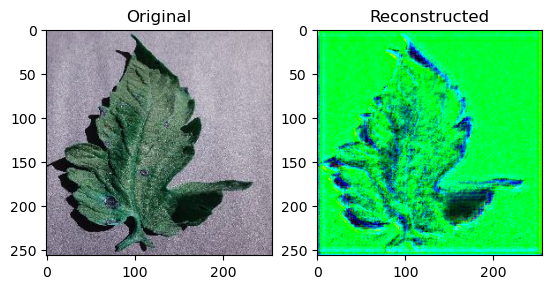

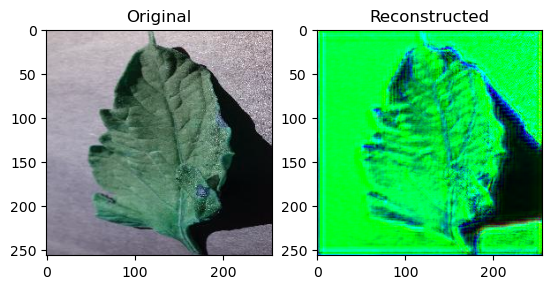

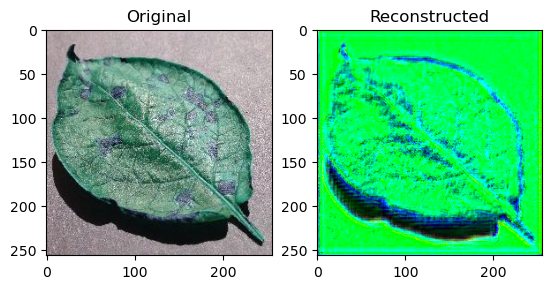

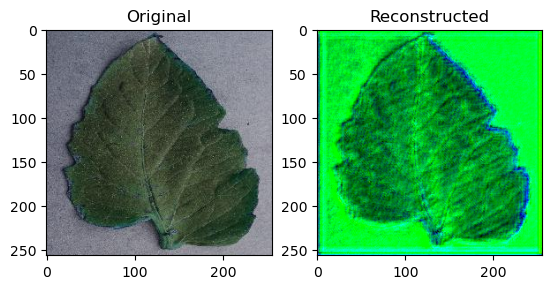

In [10]:
for i in range(5):
    img = x_test[i]
    rec = result[i]
    visualize2(img,rec)

The output image generated by this particular autoencoder appears to be quite unusual, as it has changed the background color from gray to a bright green shade. Based on our evaluation, it appears that the second autoencoder outperforms the other two that we have considered.

## Image denoising

In this section, we will be introducing noise into our data manually, and then evaluating the denoising performance of the first and second autoencoders from the previous section.

In [35]:
def apply_gaussian_noise(X, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

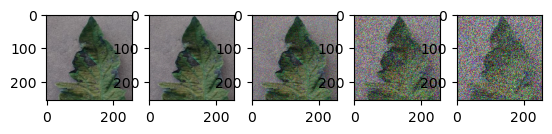

In [37]:
plt.subplot(1,5,1)
show_image(x_train[0])
plt.subplot(1,5,2)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.01)[0])
plt.subplot(1,5,3)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.1)[0])
plt.subplot(1,5,4)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.3)[0])
plt.subplot(1,5,5)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.5)[0])

To test the denoising performance, I have selected the images with a noise standard deviation of 0.1.

In [92]:
code_size = 100

# We can use bigger code size for better quality
encoder, decoder = build_autoencoder(IMG_SHAPE, code_size=code_size)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp, reconstruction)
autoencoder.compile('adamax', 'mse')

for i in range(25):
    print("Epoch %i/25, Generating corrupted samples..."%(i+1))
    x_train_noise = apply_gaussian_noise(x_train)
    x_test_noise = apply_gaussian_noise(x_test)

    # We continue to train our model with new noise-augmented data
    autoencoder.fit(x=x_train_noise, y=x_train, epochs=1,
                    validation_data=[x_test_noise, x_test])

Epoch 1/25, Generating corrupted samples...
57/57 [==============================] - 20s 312ms/step - loss: 1.6908 - val_loss: 0.0398
Epoch 2/25, Generating corrupted samples...
57/57 [==============================] - 21s 316ms/step - loss: 0.0293 - val_loss: 0.0274
Epoch 3/25, Generating corrupted samples...
57/57 [==============================] - 21s 331ms/step - loss: 0.0269 - val_loss: 0.0273
Epoch 4/25, Generating corrupted samples...
57/57 [==============================] - 24s 381ms/step - loss: 0.0268 - val_loss: 0.0272
Epoch 5/25, Generating corrupted samples...
57/57 [==============================] - 22s 341ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 6/25, Generating corrupted samples...
57/57 [==============================] - 22s 323ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 7/25, Generating corrupted samples...
57/57 [==============================] - 22s 347ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 8/25, Generating corrupted samples...
57/57 [===========

1/1 [==============================] - 0s 102ms/step


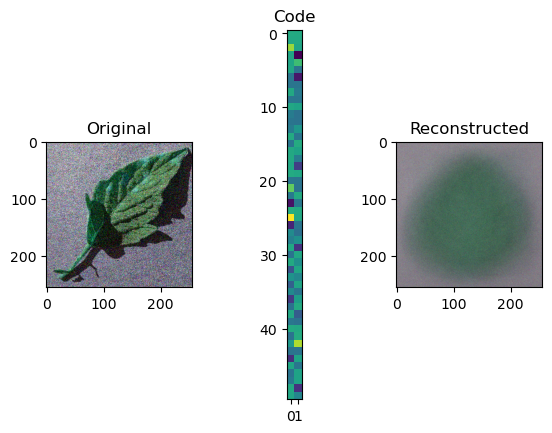

1/1 [==============================] - 0s 27ms/step


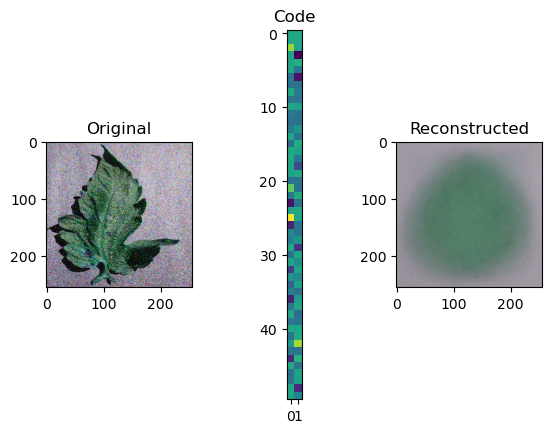

1/1 [==============================] - 0s 24ms/step


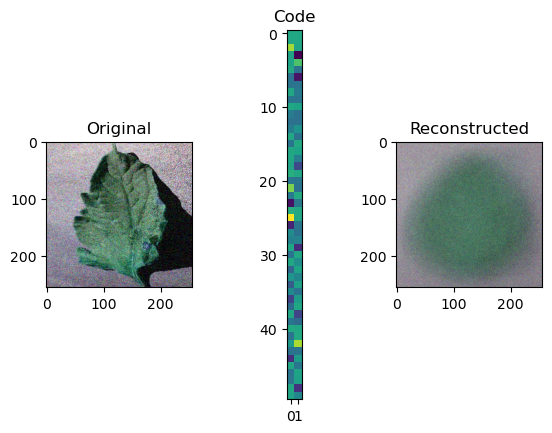

1/1 [==============================] - 0s 36ms/step


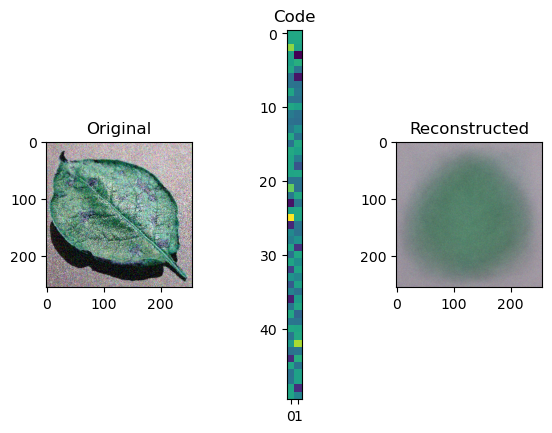

1/1 [==============================] - 0s 24ms/step


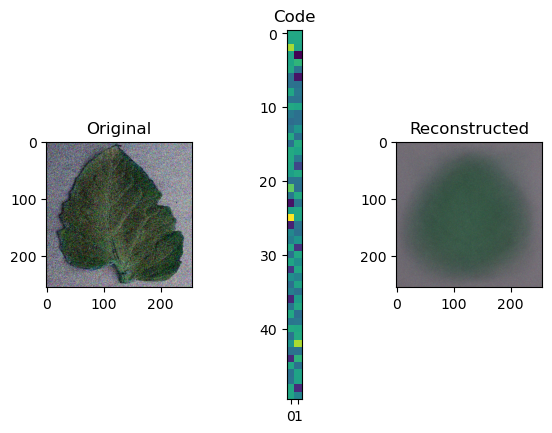

In [93]:
x_test_noise = apply_gaussian_noise(x_test)
for i in range(5):
    img = x_test_noise[i]
    visualize(img,encoder,decoder)

The quality of reconstructed images is lower than the output of auto encoder that trained with original images.

### Another auto encoder for denoising

In [38]:
denoise2 = create_model()

In [39]:
for i in range(25):
    print("Epoch %i/25, Generating corrupted samples..."%(i+1))
    x_train_noise = apply_gaussian_noise(x_train)
    x_test_noise = apply_gaussian_noise(x_test)

    # We continue to train our model with new noise-augmented data
    denoise2.fit(x=x_train_noise, y=x_train, epochs=1,
                    validation_data=[x_test_noise, x_test])

Epoch 1/25, Generating corrupted samples...
57/57 [==============================] - 168s 3s/step - loss: 0.0122 - val_loss: 0.0361
Epoch 2/25, Generating corrupted samples...
57/57 [==============================] - 177s 3s/step - loss: 0.0078 - val_loss: 0.0326
Epoch 3/25, Generating corrupted samples...
57/57 [==============================] - 187s 3s/step - loss: 0.0074 - val_loss: 0.0295
Epoch 4/25, Generating corrupted samples...
57/57 [==============================] - 176s 3s/step - loss: 0.0069 - val_loss: 0.0281
Epoch 5/25, Generating corrupted samples...
57/57 [==============================] - 175s 3s/step - loss: 0.0072 - val_loss: 0.0227
Epoch 6/25, Generating corrupted samples...
57/57 [==============================] - 183s 3s/step - loss: 0.0067 - val_loss: 0.0192
Epoch 7/25, Generating corrupted samples...
57/57 [==============================] - 175s 3s/step - loss: 0.0067 - val_loss: 0.0150
Epoch 8/25, Generating corrupted samples...
57/57 [=========================

In [45]:
x_test_noise = apply_gaussian_noise(x_test)
result = denoise2.predict(x_test_noise)

15/15 [==============================] - 10s 615ms/step


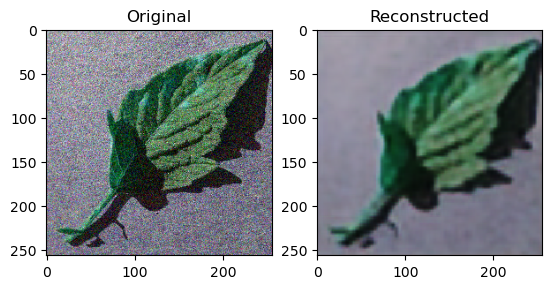

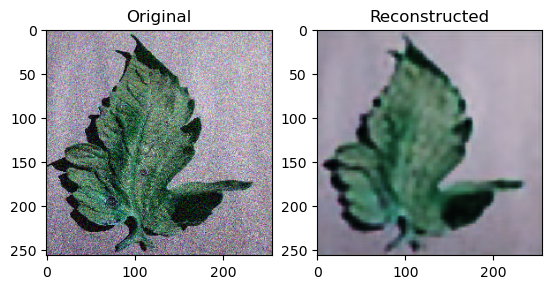

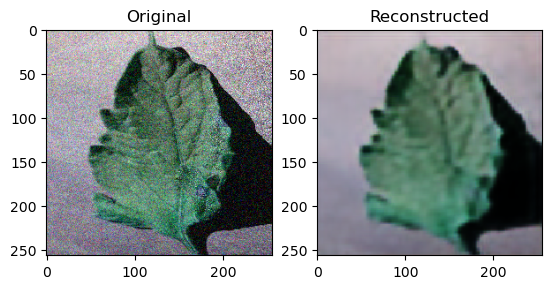

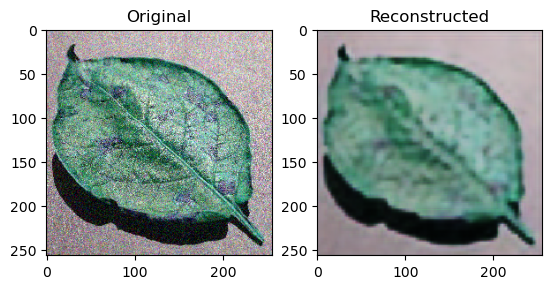

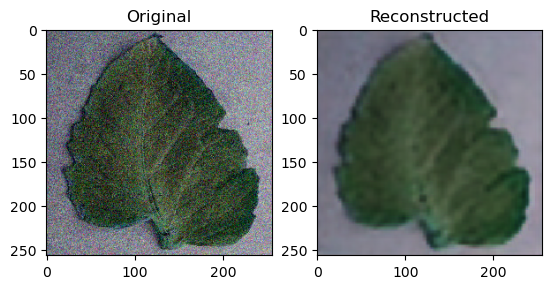

In [62]:
for i in range(5):
    img = x_test_noise[i]
    rec = result[i]
    visualize2(img,rec)

As anticipated, the reconstructed images generated by the more complex model exhibit superior quality compared to those generated by the other autoencoder. However, surprisingly, the output images from the autoencoder trained with images containing Gaussian noise perform better than those from the autoencoder trained with the original images.